In [33]:
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

In [34]:
pd.read_csv?

In [35]:
nRowsRead = None
nColumnsRead = None
df = pd.read_csv('./METABRIC_RNA_Mutation.csv', delimiter=',', nrows = nRowsRead, index_col=nColumnsRead)
df.dataframeName = 'METABRIC_RNA_Mutation.csv'

/home/dimasik99/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [36]:
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df.tail()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
1899,7295,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1900,7296,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1901,7297,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1902,7298,61.16,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1903,7299,60.02,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 693 entries, patient_id to siah1_mut
dtypes: float64(498), int64(5), object(190)
memory usage: 10.1+ MB


---------------------------- Общая кривая выживаемости для всех пациентов ----------------------------

In [39]:
kmf_general = KaplanMeierFitter()
kmf_general.fit(df.overall_survival_months, event_observed = df.overall_survival, label='Overall survival curve')

<lifelines.KaplanMeierFitter:"Overall survival curve", fitted with 1904 total observations, 1103 right-censored observations>

<AxesSubplot:xlabel='timeline'>

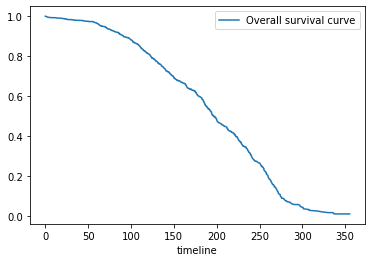

In [40]:
kmf_general.survival_function_.plot()

<AxesSubplot:xlabel='timeline'>

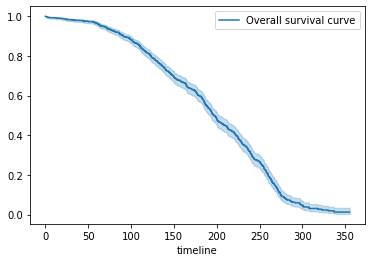

In [41]:
kmf_general.plot()

----------------- Кривая выживаемости для раздичных пациентов проходивших радиотерапию -----------------

In [42]:
kmf_radiotherapy = KaplanMeierFitter()
kmf_radiotherapy.fit(df.overall_survival_months[df.radio_therapy == 1], event_observed = df.overall_survival[df.radio_therapy == 1], label='Survival curve for radiotherapy')

<lifelines.KaplanMeierFitter:"Survival curve for radiotherapy", fitted with 1137 total observations, 607 right-censored observations>

<AxesSubplot:xlabel='timeline'>

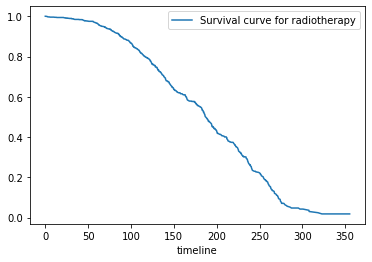

In [43]:
kmf_radiotherapy.survival_function_.plot()

<AxesSubplot:xlabel='timeline'>

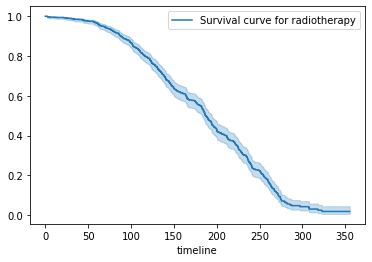

In [44]:
kmf_radiotherapy.plot()

----------------- Сравнение кривой выживаемости для радиотерапии и дугих видов лечения -----------------

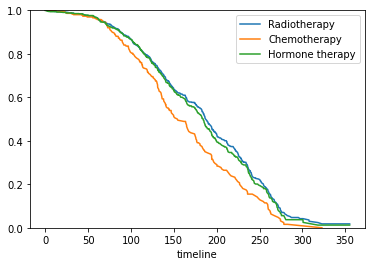

In [48]:
kmf_therapy = KaplanMeierFitter()

ax = plt.subplot(111)

kmf_therapy.fit(df.overall_survival_months[df.radio_therapy == 1],
                event_observed = df.overall_survival[df.radio_therapy == 1],
                label="Radiotherapy")
kmf_therapy.survival_function_.plot(ax=ax)

kmf_therapy.fit(df.overall_survival_months[df.chemotherapy == 1],
                event_observed = df.overall_survival[df.chemotherapy == 1],
                label="Chemotherapy")
kmf_therapy.survival_function_.plot(ax=ax)

kmf_therapy.fit(df.overall_survival_months[df.hormone_therapy == 1],
                event_observed = df.overall_survival[df.hormone_therapy == 1],
                label="Hormone therapy")
kmf_therapy.survival_function_.plot(ax=ax)

plt.ylim(0,1);

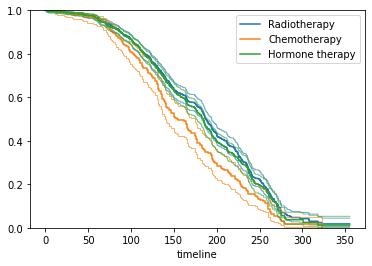

In [49]:
kmf_therapy_confidence_interval = KaplanMeierFitter()

ax = plt.subplot(111)

kmf_therapy_confidence_interval.fit(df.overall_survival_months[df.radio_therapy == 1],
                                    event_observed = df.overall_survival[df.radio_therapy == 1],
                                    label="Radiotherapy")
kmf_therapy_confidence_interval.plot(ax=ax, ci_force_lines=True)

kmf_therapy_confidence_interval.fit(df.overall_survival_months[df.chemotherapy == 1],
                                    event_observed = df.overall_survival[df.chemotherapy == 1],
                                    label="Chemotherapy")
kmf_therapy_confidence_interval.plot(ax=ax, ci_force_lines=True)

kmf_therapy_confidence_interval.fit(df.overall_survival_months[df.hormone_therapy == 1],
                                    event_observed = df.overall_survival[df.hormone_therapy == 1],
                                    label="Hormone therapy")
kmf_therapy_confidence_interval.plot(ax=ax, ci_force_lines=True)

plt.ylim(0,1);

----------------- Кривая выживаемости для эстроген позитивного и отрицательного статуса пациента -----------------

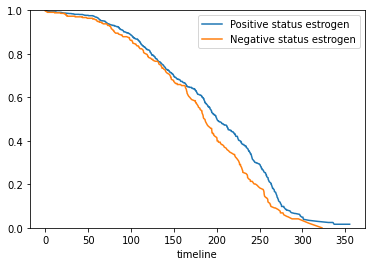

In [50]:
kmf_estrogen_status = KaplanMeierFitter()

ax = plt.subplot(111)

kmf_estrogen_status.fit(df.overall_survival_months[df.er_status == 'Positive'],
                        event_observed = df.overall_survival[df.er_status == 'Positive'],
                        label="Positive status estrogen")
kmf_estrogen_status.survival_function_.plot(ax=ax)

kmf_estrogen_status.fit(df.overall_survival_months[df.er_status == 'Negative'],
                        event_observed = df.overall_survival[df.er_status == 'Negative'],
                        label="Negative status estrogen")
kmf_estrogen_status.survival_function_.plot(ax=ax)

plt.ylim(0,1);

----------------- Кривая выживаемости для Her2 позитивного и отрицательного статуса пациента -----------------

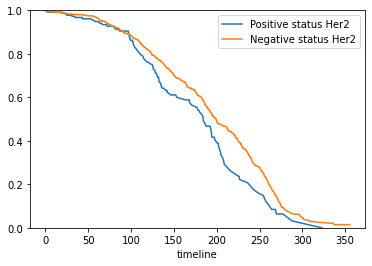

In [54]:
kmf_her2_status = KaplanMeierFitter()

ax = plt.subplot(111)

kmf_her2_status.fit(df.overall_survival_months[df.her2_status == 'Positive'],
                    event_observed = df.overall_survival[df.her2_status == 'Positive'],
                    label="Positive status Her2")
kmf_her2_status.survival_function_.plot(ax=ax)

kmf_her2_status.fit(df.overall_survival_months[df.her2_status == 'Negative'],
                    event_observed = df.overall_survival[df.her2_status == 'Negative'],
                    label="Negative status Her2")
kmf_her2_status.survival_function_.plot(ax=ax)

plt.ylim(0,1);

----------------- Кривая выживаемости пациента c разной стадией рака -----------------

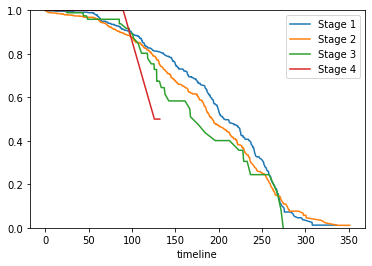

In [55]:
kmf_tumor_stage = KaplanMeierFitter()

ax = plt.subplot(111)

kmf_tumor_stage.fit(df.overall_survival_months[df.tumor_stage == 1],
                    event_observed = df.overall_survival[df.tumor_stage == 1],
                    label="Stage 1")
kmf_tumor_stage.survival_function_.plot(ax=ax)

kmf_tumor_stage.fit(df.overall_survival_months[df.tumor_stage == 2],
                    event_observed = df.overall_survival[df.tumor_stage == 2],
                    label="Stage 2")
kmf_tumor_stage.survival_function_.plot(ax=ax)

kmf_tumor_stage.fit(df.overall_survival_months[df.tumor_stage == 3],
                    event_observed = df.overall_survival[df.tumor_stage == 3],
                    label="Stage 3")
kmf_tumor_stage.survival_function_.plot(ax=ax)

kmf_tumor_stage.fit(df.overall_survival_months[df.tumor_stage == 4],
                    event_observed = df.overall_survival[df.tumor_stage == 4],
                    label="Stage 4")
kmf_tumor_stage.survival_function_.plot(ax=ax)

plt.ylim(0,1);

----------------- Кривая выживаемости для пациентов по возрастам -----------------

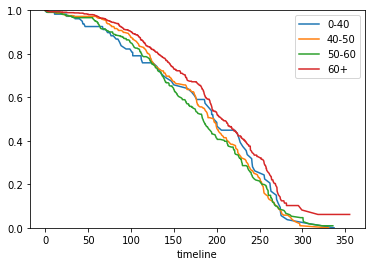

In [61]:
kmf_age = KaplanMeierFitter()

ax = plt.subplot(111)

kmf_age.fit(df.overall_survival_months[df.age_at_diagnosis < 40],
            event_observed = df.overall_survival[df.age_at_diagnosis < 40],
            label="0-40")
kmf_age.survival_function_.plot(ax=ax)

kmf_age.fit(df.overall_survival_months[df.age_at_diagnosis.between(40, 50)],
            event_observed = df.overall_survival[df.age_at_diagnosis.between(40, 50)],
            label="40-50")
kmf_age.survival_function_.plot(ax=ax)

kmf_age.fit(df.overall_survival_months[df.age_at_diagnosis.between(50, 60)],
            event_observed = df.overall_survival[df.age_at_diagnosis.between(50, 60)],
            label="50-60")
kmf_age.survival_function_.plot(ax=ax)

kmf_age.fit(df.overall_survival_months[df.age_at_diagnosis > 60],
            event_observed = df.overall_survival[df.age_at_diagnosis > 60],
            label="60+")
kmf_age.survival_function_.plot(ax=ax)

plt.ylim(0,1);